In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('../input/big-mart-sales-prediction/Train.csv')
test=pd.read_csv('../input/big-mart-sales-prediction/Test.csv')

# EDA

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.shape

(8523, 12)

train datset has 8523 rows and 12 columns

In [6]:
test.shape

(5681, 11)

test dataset has 5681 rows and 11 columns

In [7]:
#We will combine train and test data for better Analysis
train['source']='train'
test['source']='test'
test['Item_Outlet_Sales']=0.0

#Concatenating the data in df variable
df=pd.concat([train,test],sort=False,ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


Our new dataset has 14204 rows and 13 columns

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

Item weight column has about 2439 missing values and outlet size column has 4016 NaN values

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

Datset has 8 rows with object type data out of which we have created one and one is an identifier column. others we will have to encode them

In [10]:
df.skew()

Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

There is skewness present in the item visibility which need to be handled

In [11]:
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

Item_Identifier, Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales are continuos type of data rest are categorical.

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


There are null values present in item weight as count less than total rows, mean is less than median in item mrp and outlet establishment year, rest of the features have median greater than median. Variance is almost zero in item visibility column and very high in item mrp. There are some outliers present as difference between min, max and interquartile range is unequal. Minimum value of visibility is zero that can not be posiible so we will treat it as a null value

### Univariate Analysis

In [13]:
#Lets separate categorical features first
cat=[feature for feature in df.columns if df[feature].nunique()<20 and feature!='source']
cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

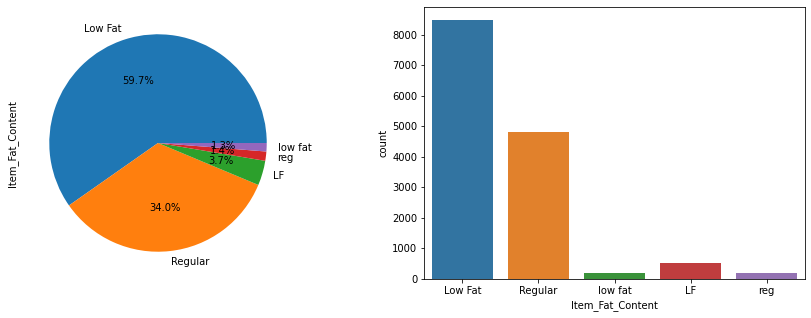

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Item_Fat_Content'])
df['Item_Fat_Content'].value_counts()

Different low fat categories need to be merged. Same must be done with regular categories. Low Fat products are much more than Regular products.

OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

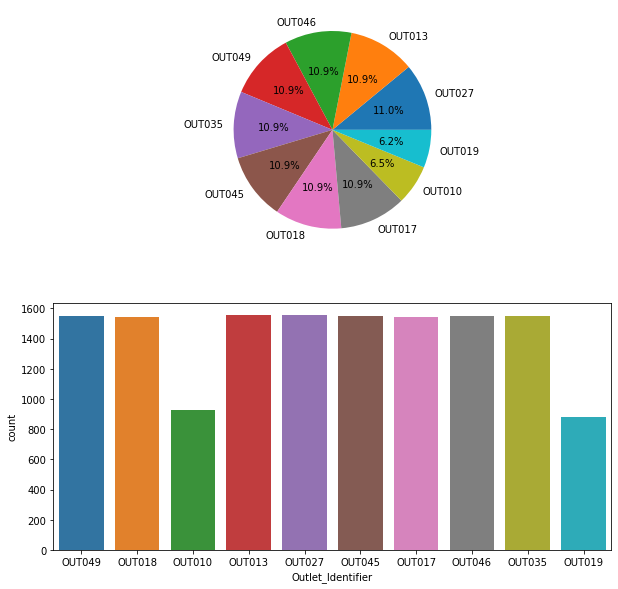

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
df['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(df['Outlet_Identifier'])
df['Outlet_Identifier'].value_counts()

There are 10 outlets which are almost balanced except for two outlets

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

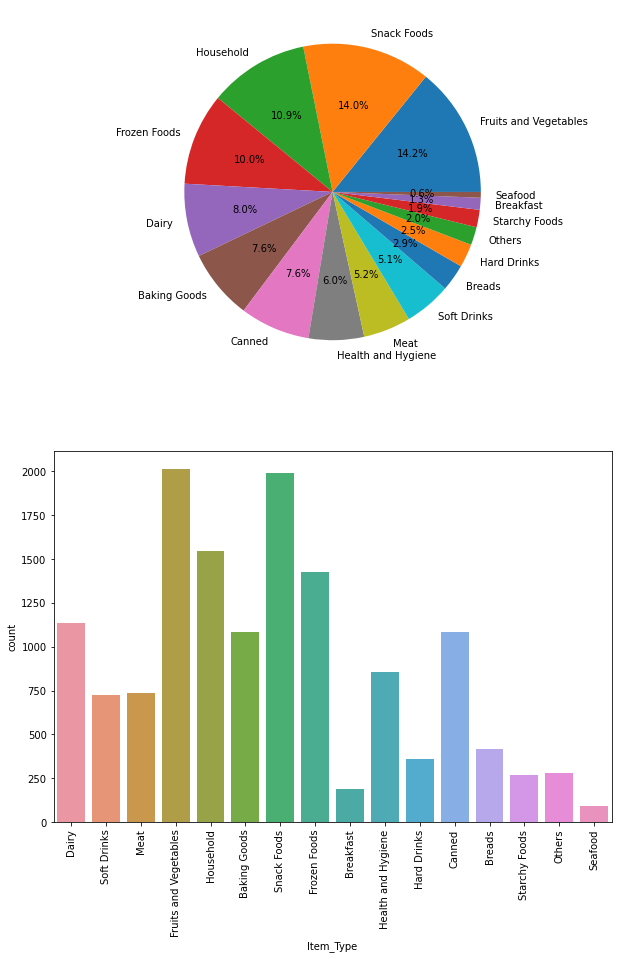

In [16]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize':10})
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(df['Item_Type'])
plt.xticks(rotation = 90)
df['Item_Type'].value_counts()

Fruits and Vegetables and Snack Foods are the two categories in which most of the items fall whereas Seafood is the least

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

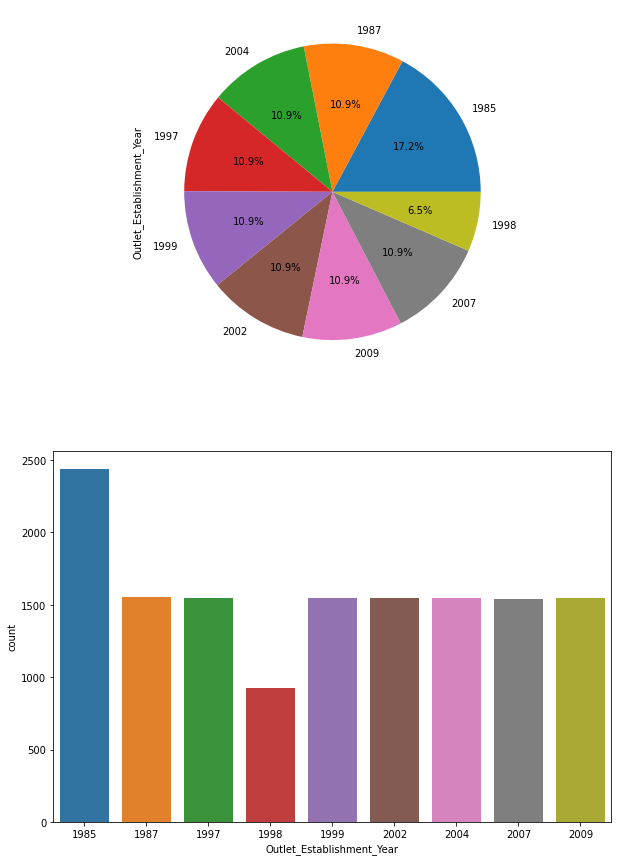

In [17]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df['Outlet_Establishment_Year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(2,1,2)
sns.countplot(df['Outlet_Establishment_Year'])
df['Outlet_Establishment_Year'].value_counts()

Most outlets were opened in 1985 and least in 1998

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

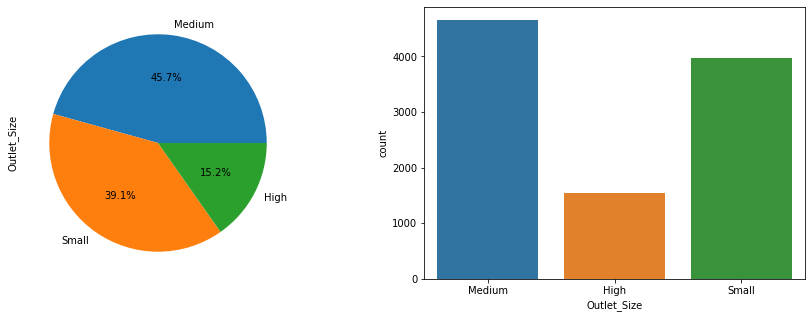

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Outlet_Size'])
df['Outlet_Size'].value_counts()

There are few outlets with high size. most of the outlets are of medium size.

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

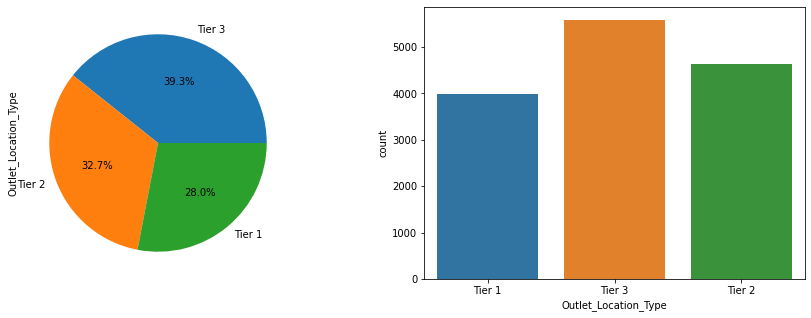

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Outlet_Location_Type'])
df['Outlet_Location_Type'].value_counts()

Most of the stores are located in tier 2 cities/

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

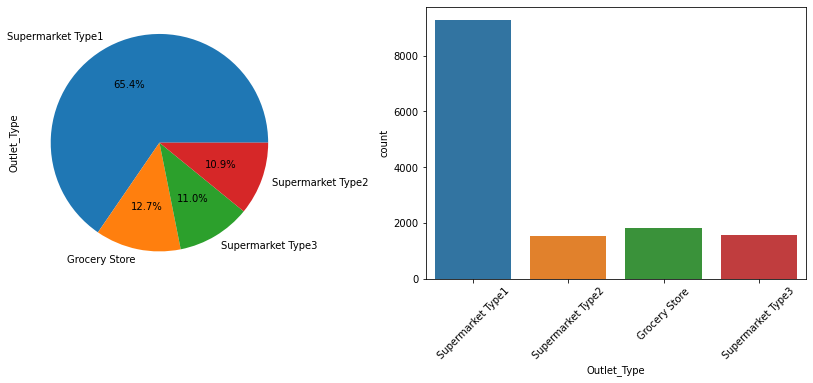

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Outlet_Type'])
plt.xticks(rotation=45)
df['Outlet_Type'].value_counts()

65% of the outlets are of supermarket type 1

In [21]:
#Separating the continuous feature
cont=[feature for feature in df.columns if df[feature].nunique()>20 and feature!='Item_Identifier' and feature!='Item_Outlet_Sales']
cont

['Item_Weight', 'Item_Visibility', 'Item_MRP']

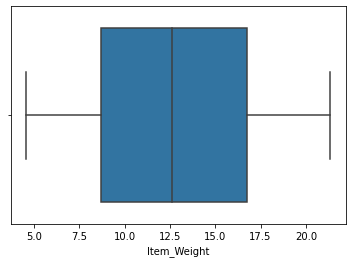

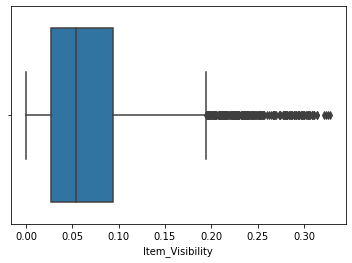

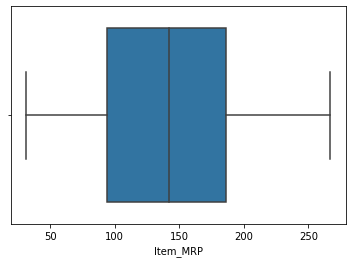

<Figure size 432x288 with 0 Axes>

In [22]:
for feat in cont:
    sns.boxplot(df[feat])
    plt.figure()

Only Item Visibility has large no. of outliers

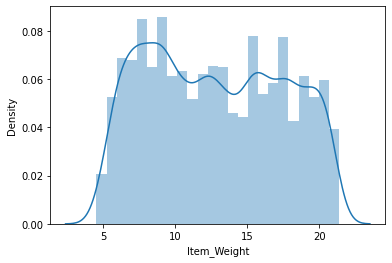

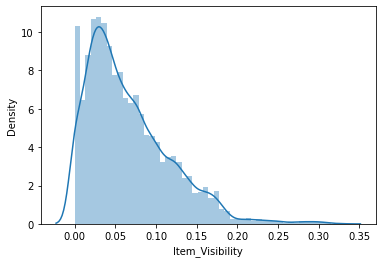

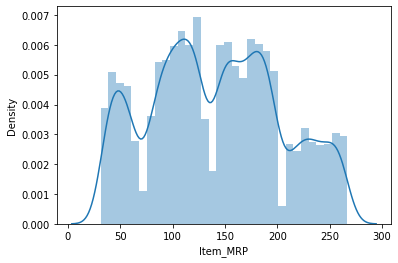

<Figure size 432x288 with 0 Axes>

In [23]:
for feat in cont:
    sns.distplot(df[feat])
    plt.figure()

Only Item visibility is skewed to the right while others almost follow the gaussian distribution.

### Bivariate Analysis

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Type'>

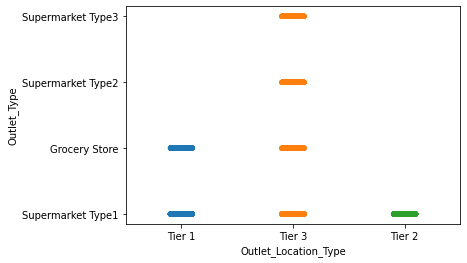

In [24]:
sns.stripplot(df['Outlet_Location_Type'],df['Outlet_Type'])

Tier 3 cities have only Superkarket type 1 whereas Tier 1 cities have only supermarket 1 and grocery strores

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Type'>

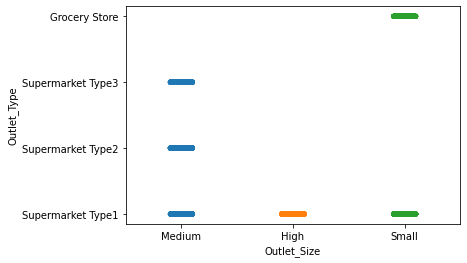

In [25]:
sns.stripplot(df['Outlet_Size'],df['Outlet_Type'])

Supermarket type 1 are of all sizes whereas grocery stores are only small and Supermarket type 2, Supermarket type 3 are of medium size only.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

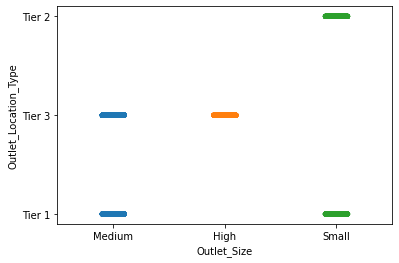

In [26]:
sns.stripplot(df['Outlet_Size'],df['Outlet_Location_Type'])

Tier 2 citis have only small outlet size and high outlet size is only found in tier 3 cities

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Type'>

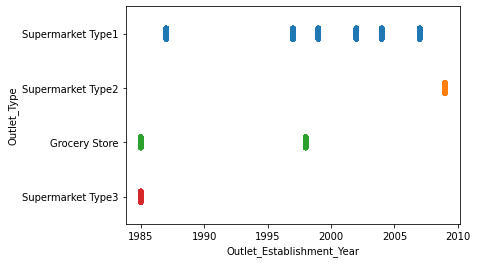

In [27]:
sns.stripplot(df['Outlet_Establishment_Year'],df['Outlet_Type'])

Supermarket type 2 was build much later while grocery stores and supermarket are the oldest outlet type.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

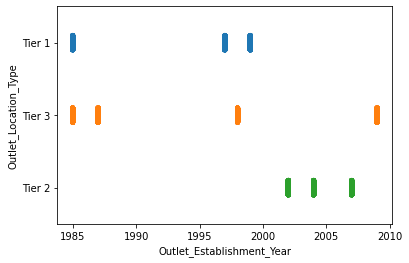

In [28]:
sns.stripplot(df['Outlet_Establishment_Year'],df['Outlet_Location_Type'])

In Tier1 and tier2 cities outlets were established in 1985 whereas tier2 got outlets after 2000

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Size'>

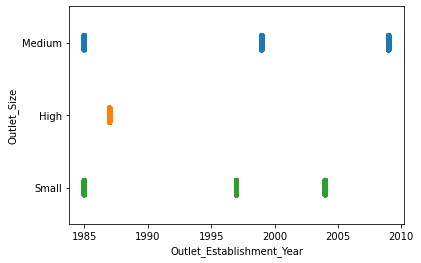

In [29]:
sns.stripplot(df['Outlet_Establishment_Year'],df['Outlet_Size'])

After 1990 no outlet of high size was established.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Type'>

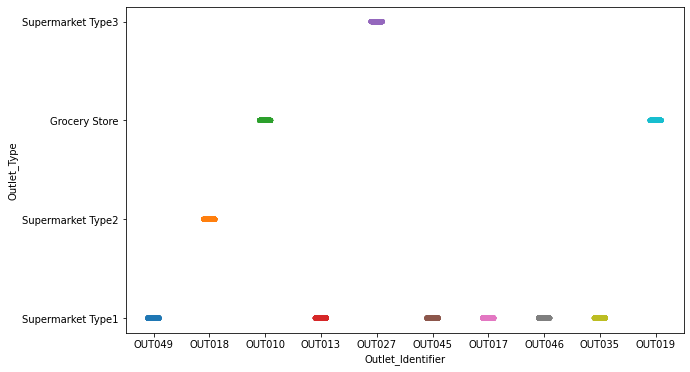

In [30]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Identifier'],df['Outlet_Type'])

There is only one oulat identifier for supermarket 2 and 3 while most of the outlet identifiers belong to supermarket1

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Location_Type'>

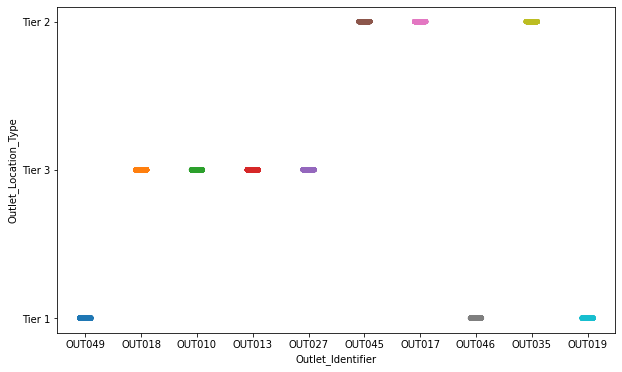

In [31]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Identifier'],df['Outlet_Location_Type'])

Tier 3 has the most diff types of outlets, but they are almost balanced.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Identifier'>

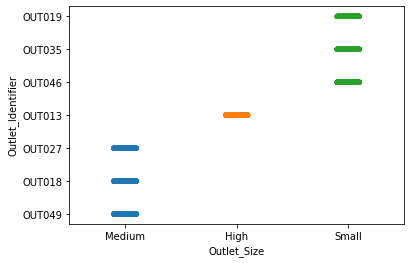

In [32]:
sns.stripplot(df['Outlet_Size'],df['Outlet_Identifier'])

There is only Outlet13 with high outlet size while medium and small of outlets each have 3 outlet identifiers. 

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

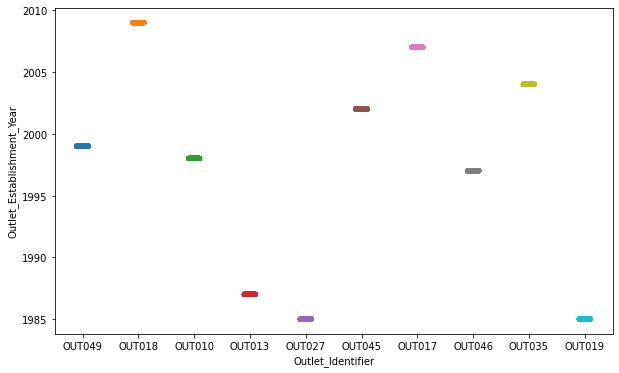

In [33]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Identifier'],df['Outlet_Establishment_Year'])

Outlet 27 and 19 are the oldest outlet identifier and outlet 18  is the newest, outlet no. does not hold any order towards year of establishment. 

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Visibility'>

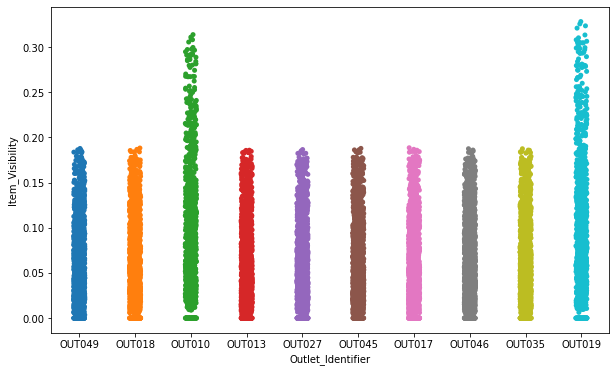

In [34]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Identifier'],df['Item_Visibility'])

Outlet 10 and 19 have give the highest visibilty to products. Other outlets provide almost equal visibility.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Visibility'>

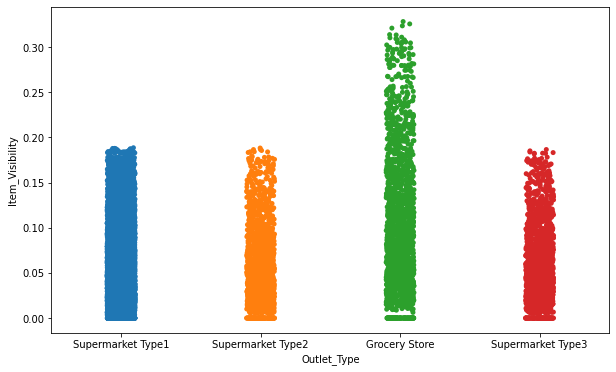

In [35]:
plt.figure(figsize=(10,6))
sns.stripplot(df['Outlet_Type'],df['Item_Visibility'])

Products are most visible in grocery stores rather than any other super markets

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

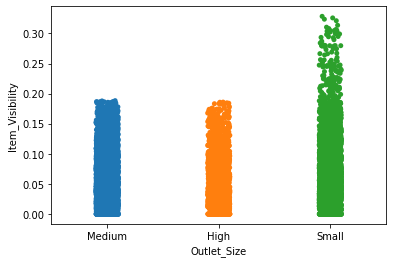

In [36]:
sns.stripplot(df['Outlet_Size'],df['Item_Visibility'])

Smallest Stores provide the most visibility to products

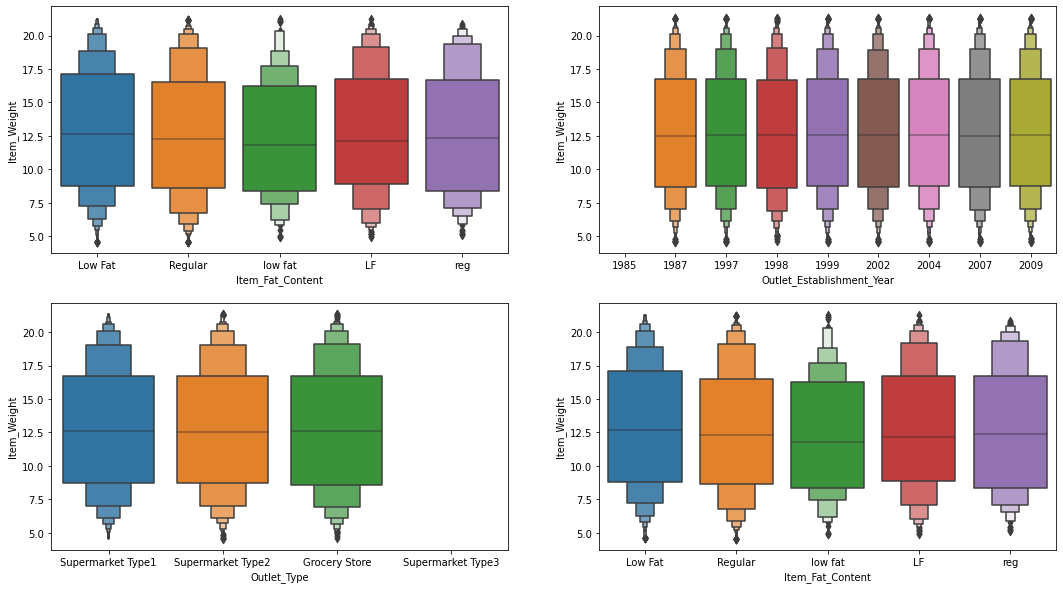

In [37]:
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i,n in enumerate(['Item_Fat_Content','Outlet_Establishment_Year','Outlet_Type','Item_Fat_Content']):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxenplot(x=df[n],y=df['Item_Weight'],ax=ax[r,c])
    c+=1

Data of weight is missing for Supermarket 3 and for the year 1985, Median of low fat content is lowest.

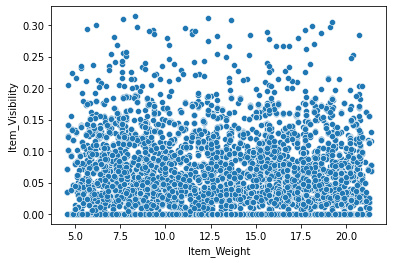

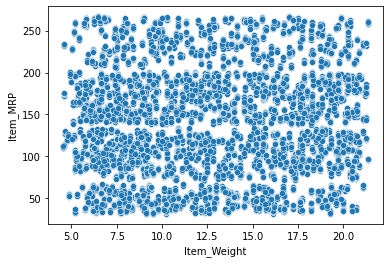

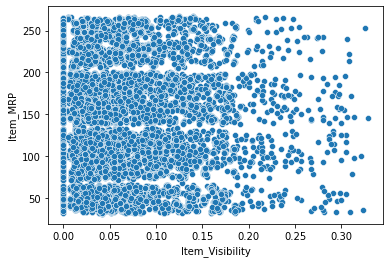

<Figure size 432x288 with 0 Axes>

In [38]:
for i in range(len(cont)):
    for j in range(i+1,len(cont)):
        sns.scatterplot(x=cont[i],y=cont[j],data=df)
        plt.figure()

There are less products with high visibility. There seem to exist no correlation between the above continuous features

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

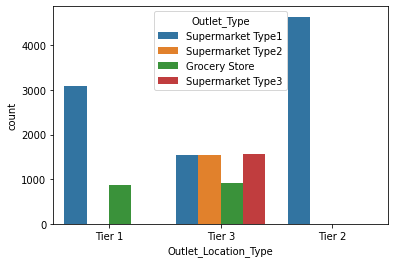

In [39]:
sns.countplot(df['Outlet_Location_Type'],hue=df['Outlet_Type'])

Tier 2 cities have the highest no. of supermarket 2 and donot habe any other type of outlet whereas tier 3 cities have all the types of outlets with less no. of each of them.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

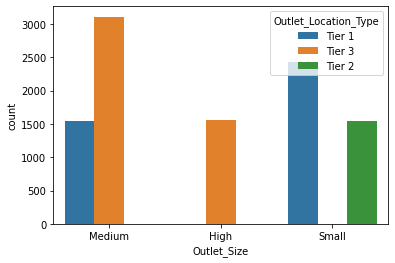

In [40]:
sns.countplot(df['Outlet_Size'],hue=df['Outlet_Location_Type'])

Tier 3 cities have the highest no. of medioum size outlet and tier 1 cities have highest no. small size outlets.Tier 3 cities have the least no. of stores

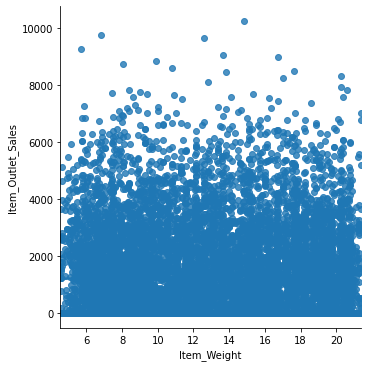

In [41]:
sns.lmplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

There is no relation between item weight and item outlet sales.

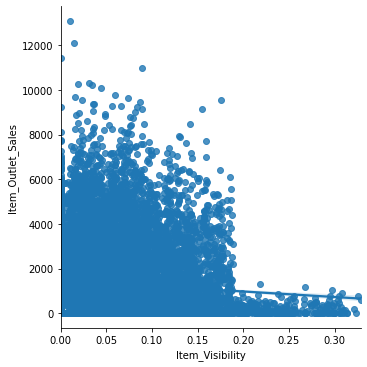

In [42]:
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

Ttem outlet sales sharply decreases for the most visible items

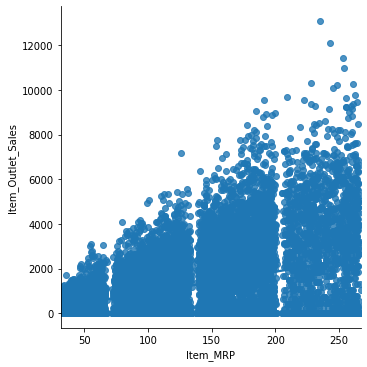

In [43]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

As the mrp of an item increases item outlet sales also increases

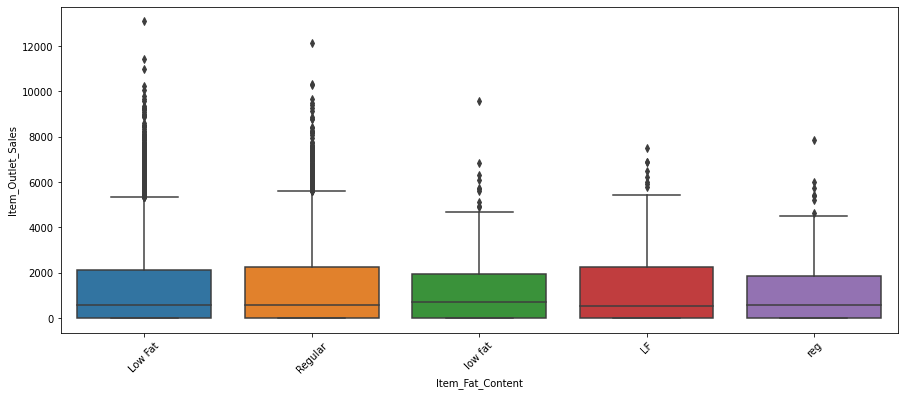

<Figure size 432x288 with 0 Axes>

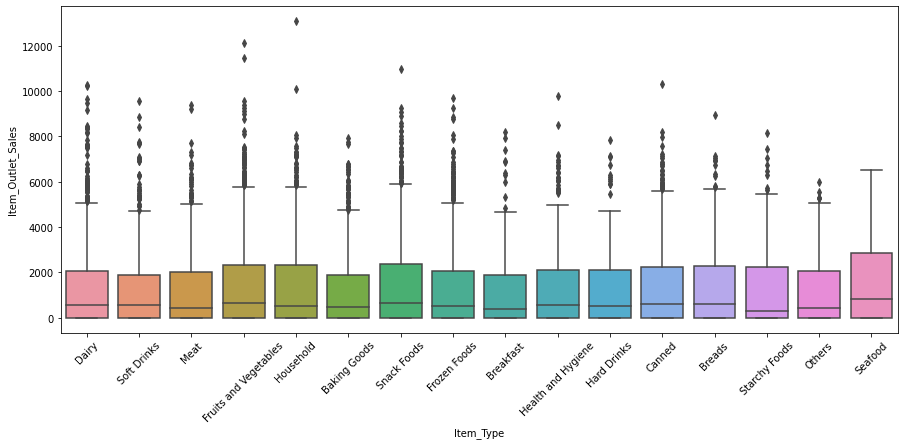

<Figure size 432x288 with 0 Axes>

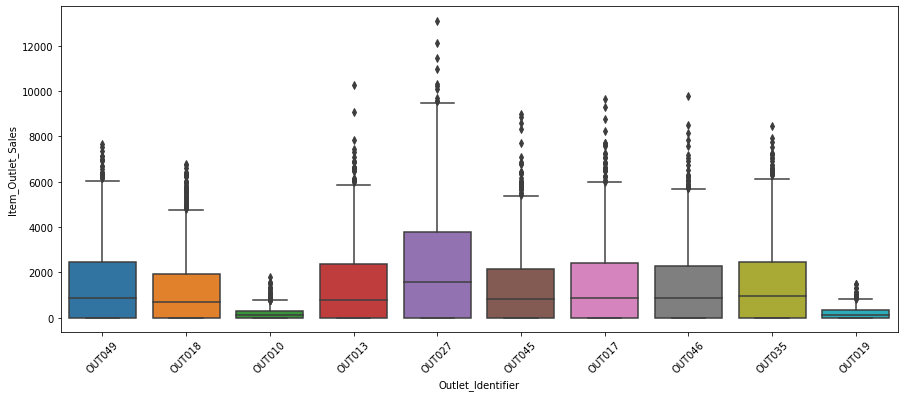

<Figure size 432x288 with 0 Axes>

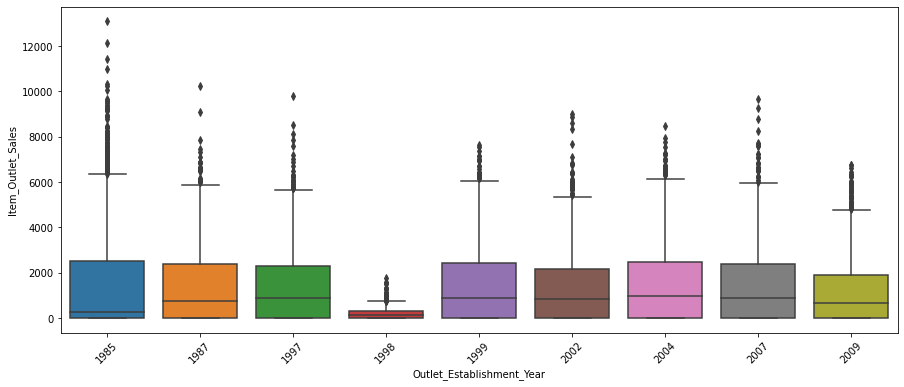

<Figure size 432x288 with 0 Axes>

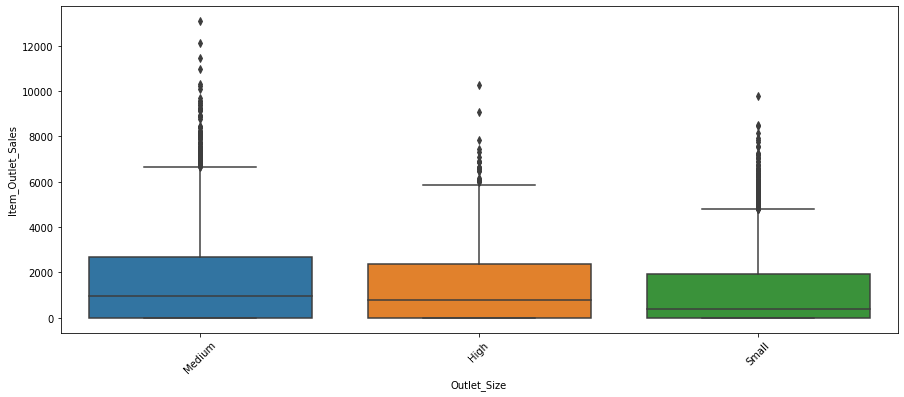

<Figure size 432x288 with 0 Axes>

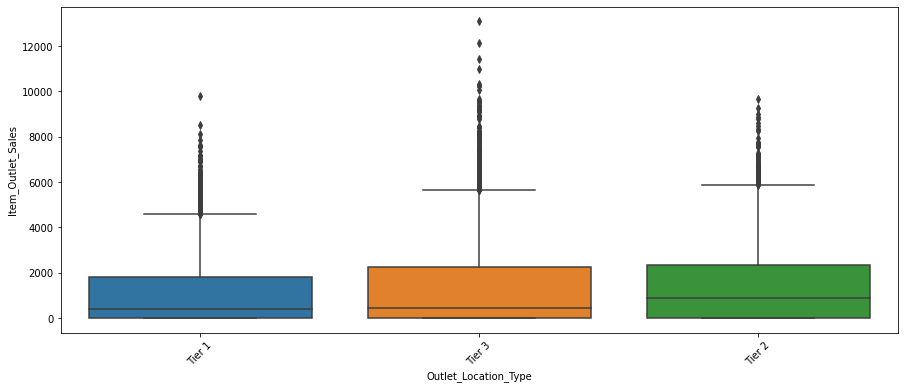

<Figure size 432x288 with 0 Axes>

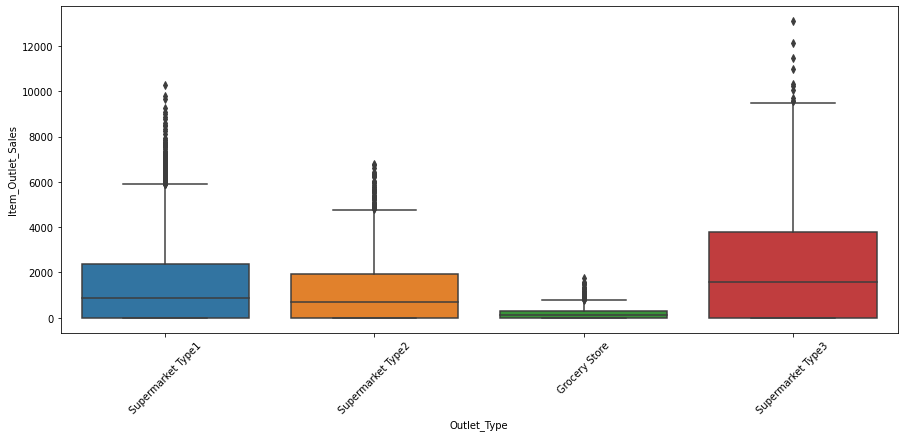

<Figure size 432x288 with 0 Axes>

In [44]:
for i in cat:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=df[i],y=df['Item_Outlet_Sales'])
    plt.xticks(rotation=45)
    plt.figure()

There is not much relation between fat content and item outlet sales. Seafoord, Vegetables and fruits contribute towards the item outlet sales. Medium size outlets and Supermarket 3 gives the most item outlet sales. Tier 1 cities donot produce least` item outlet sales compared to other types of cities.

### Multivariate Analysis

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

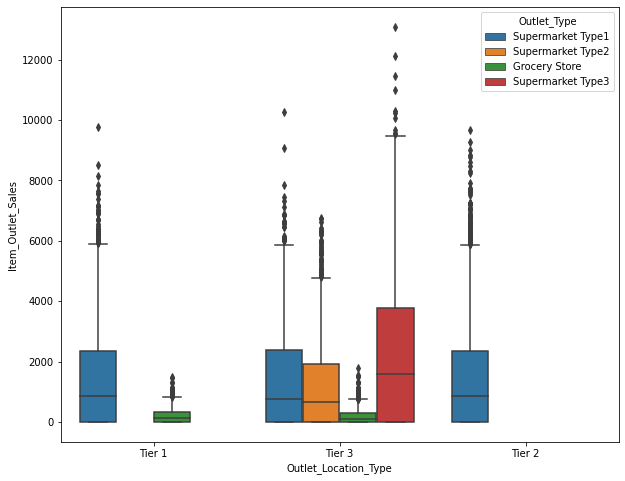

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df)

Tier 3 ;ocations have the most sales. It can also be seen that they have most type of outlets, hence more sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

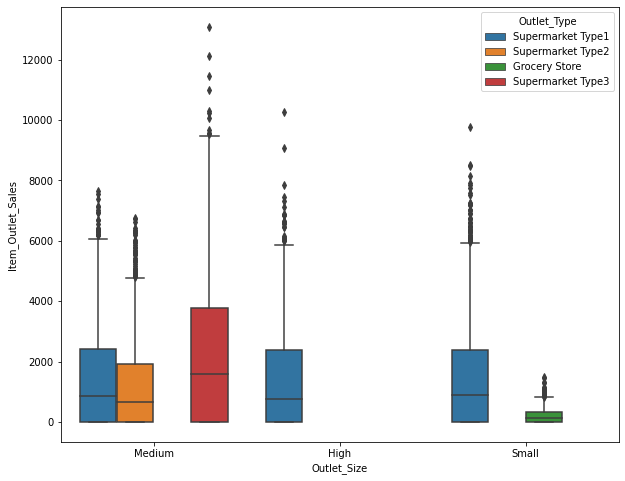

In [46]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Size','Item_Outlet_Sales',hue='Outlet_Type',data=df)

It can be seen that medium size outlets sell the most and also they have the most type of ooutlets hence the sales increases even more

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

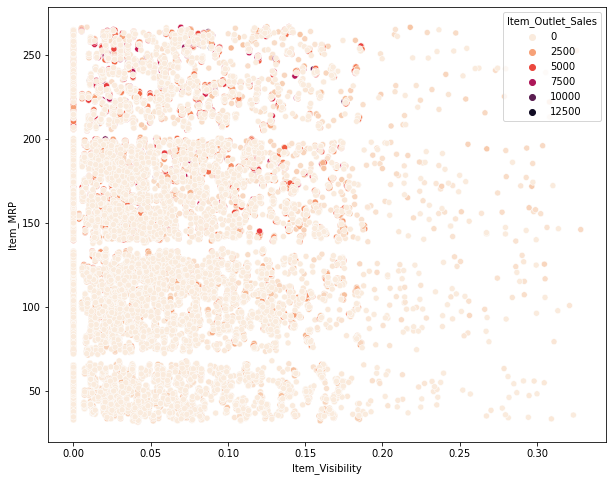

In [47]:
plt.figure(figsize=(10,8))
sns.scatterplot('Item_Visibility','Item_MRP',hue='Item_Outlet_Sales',data=df,palette='rocket_r')

Item_Outlet_Sales increases with low item visibility and high item price.

<AxesSubplot:>

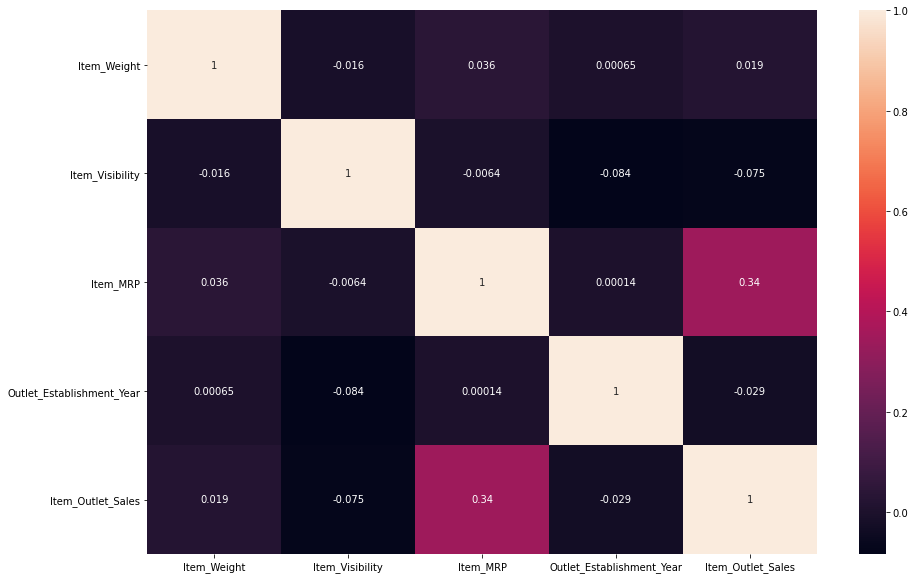

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

MRP has the strongest positive correlation with Sales, while cisibility and establishment show a little negative correlation. There is not much correlation between the independent features.

This also contain missing values 